# scenario 1: use cgm data of 9 adults predict 1 adult(30 days)

## import and concat 10 cgm data (adult)






In [385]:
import pandas as pd
from glob import glob
 
files = glob("/content/drive/MyDrive/cgm_pred/simulate_cgm_60days/adult*.csv")
 
df_list = [pd.read_csv(file) for file in files]

cgm_key = ["Time"]
cgm_value = [df_list[0]['Time']]
for i in range(len(df_list)): 
    cgm_key.append('CGM_NO_0'+ str(i+1))
    cgm_value.append(df_list[i]['CGM'])
new_data = dict(zip(cgm_key, cgm_value))
len(new_data)

11

In [386]:
concat_cgm = pd.DataFrame(data=new_data)
concat_cgm

,Time,CGM_NO_01,CGM_NO_02,CGM_NO_03,CGM_NO_04,CGM_NO_05,CGM_NO_06,CGM_NO_07,CGM_NO_08,CGM_NO_09,CGM_NO_010
0,2021-12-04 06:00:00,139.152142,141.002142,143.022142,134.482142,132.372142,131.182142,131.562142,148.752142,138.592142,146.611025
1,2021-12-04 06:03:00,137.944663,139.794663,141.814663,133.274663,131.164663,129.974663,130.354663,147.544663,137.384663,145.403545
2,2021-12-04 06:06:00,138.634524,140.484524,142.504524,133.964524,131.854524,130.664524,131.044524,148.234524,138.074524,146.093406
3,2021-12-04 06:09:00,140.369223,142.219223,144.239223,135.699223,133.589223,132.399223,132.779223,149.969223,139.809223,147.828105
4,2021-12-04 06:12:00,142.731553,144.581553,146.601553,138.061553,135.951553,134.761553,135.141553,152.331553,142.171553,150.190435
...,...,...,...,...,...,...,...,...,...,...,...
28796,2022-02-02 05:48:00,114.158383,39.000000,165.076378,107.709543,108.150661,147.825778,161.416710,157.565243,134.157576,177.413791
28797,2022-02-02 05:51:00,116.111809,39.000000,170.285502,110.768195,109.501158,150.336405,163.630054,162.761658,136.780418,182.880087
28798,2022-02-02 05:54:00,119.502744,39.000000,176.844349,115.291827,112.386440,154.217794,167.295034,169.364998,140.989724,189.670861
28799,2022-02-02 05:57:00,123.029289,39.000000,183.390763,119.950267,115.507244,158.166058,171.106565,176.017432,145.465298,196.412449


In [387]:
concat_cgm['Time'] = pd.to_datetime(concat_cgm['Time'], format="%Y-%m-%d %H:%M:%S")

## Find the mean of first 9 cgm data

In [388]:
concat_cgm_9 = concat_cgm.drop(['CGM_NO_010'], axis=1)
concat_cgm_9

,Time,CGM_NO_01,CGM_NO_02,CGM_NO_03,CGM_NO_04,CGM_NO_05,CGM_NO_06,CGM_NO_07,CGM_NO_08,CGM_NO_09
0,2021-12-04 06:00:00,139.152142,141.002142,143.022142,134.482142,132.372142,131.182142,131.562142,148.752142,138.592142
1,2021-12-04 06:03:00,137.944663,139.794663,141.814663,133.274663,131.164663,129.974663,130.354663,147.544663,137.384663
2,2021-12-04 06:06:00,138.634524,140.484524,142.504524,133.964524,131.854524,130.664524,131.044524,148.234524,138.074524
3,2021-12-04 06:09:00,140.369223,142.219223,144.239223,135.699223,133.589223,132.399223,132.779223,149.969223,139.809223
4,2021-12-04 06:12:00,142.731553,144.581553,146.601553,138.061553,135.951553,134.761553,135.141553,152.331553,142.171553
...,...,...,...,...,...,...,...,...,...,...
28796,2022-02-02 05:48:00,114.158383,39.000000,165.076378,107.709543,108.150661,147.825778,161.416710,157.565243,134.157576
28797,2022-02-02 05:51:00,116.111809,39.000000,170.285502,110.768195,109.501158,150.336405,163.630054,162.761658,136.780418
28798,2022-02-02 05:54:00,119.502744,39.000000,176.844349,115.291827,112.386440,154.217794,167.295034,169.364998,140.989724
28799,2022-02-02 05:57:00,123.029289,39.000000,183.390763,119.950267,115.507244,158.166058,171.106565,176.017432,145.465298


In [389]:
concat_cgm_9['Mean_9_CGM'] = concat_cgm_9.mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [390]:
concat_cgm_9.head()

,Time,CGM_NO_01,CGM_NO_02,CGM_NO_03,CGM_NO_04,CGM_NO_05,CGM_NO_06,CGM_NO_07,CGM_NO_08,CGM_NO_09,Mean_9_CGM
0,2021-12-04 06:00:00,139.152142,141.002142,143.022142,134.482142,132.372142,131.182142,131.562142,148.752142,138.592142,137.791031
1,2021-12-04 06:03:00,137.944663,139.794663,141.814663,133.274663,131.164663,129.974663,130.354663,147.544663,137.384663,136.583552
2,2021-12-04 06:06:00,138.634524,140.484524,142.504524,133.964524,131.854524,130.664524,131.044524,148.234524,138.074524,137.273413
3,2021-12-04 06:09:00,140.369223,142.219223,144.239223,135.699223,133.589223,132.399223,132.779223,149.969223,139.809223,139.008112
4,2021-12-04 06:12:00,142.731553,144.581553,146.601553,138.061553,135.951553,134.761553,135.141553,152.331553,142.171553,141.370442


In [391]:
mean_9_cgm = pd.DataFrame(concat_cgm_9, columns=['Time', 'Mean_9_CGM'])
mean_9_cgm.head()

,Time,Mean_9_CGM
0,2021-12-04 06:00:00,137.791031
1,2021-12-04 06:03:00,136.583552
2,2021-12-04 06:06:00,137.273413
3,2021-12-04 06:09:00,139.008112
4,2021-12-04 06:12:00,141.370442


In [392]:
len(mean_9_cgm)

28801

In [393]:
# Turn datas to numpy array
time_steps = mean_9_cgm["Time"].to_numpy()
mean_cgm_values =  mean_9_cgm["Mean_9_CGM"].to_numpy()

time_steps[:10], mean_cgm_values[:10]

(array(['2021-12-04T06:00:00.000000000', '2021-12-04T06:03:00.000000000',
        '2021-12-04T06:06:00.000000000', '2021-12-04T06:09:00.000000000',
        '2021-12-04T06:12:00.000000000', '2021-12-04T06:15:00.000000000',
        '2021-12-04T06:18:00.000000000', '2021-12-04T06:21:00.000000000',
        '2021-12-04T06:24:00.000000000', '2021-12-04T06:27:00.000000000'],
       dtype='datetime64[ns]'),
 array([137.7910312 , 136.58355178, 137.2734129 , 139.00811184,
        141.37044186, 143.9431962 , 146.30916808, 148.05115075,
        148.75193741, 148.05879806]))

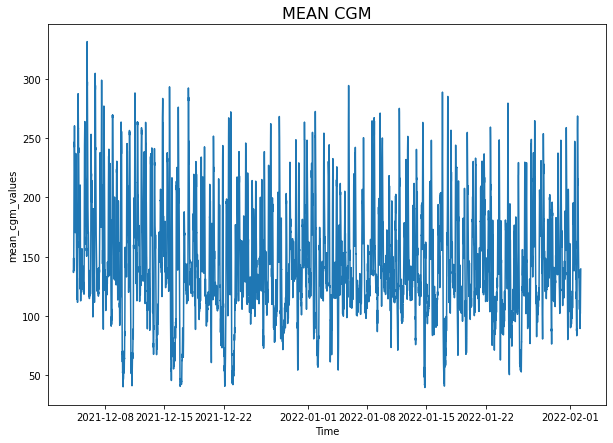

In [394]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(time_steps, mean_cgm_values)
plt.ylabel("mean_cgm_values")
plt.title("MEAN CGM", fontsize=16)
plt.xlabel("Time");

## Prepare NO_0010 data

In [395]:
cgm_no_010 = concat_cgm['CGM_NO_010'].to_numpy()
cgm_no_010

array([146.61102461, 145.40354519, 146.09340631, ..., 189.67086097,
       196.41244905, 201.33248626])

In [396]:
time_steps[:10], cgm_no_010[:10]

(array(['2021-12-04T06:00:00.000000000', '2021-12-04T06:03:00.000000000',
        '2021-12-04T06:06:00.000000000', '2021-12-04T06:09:00.000000000',
        '2021-12-04T06:12:00.000000000', '2021-12-04T06:15:00.000000000',
        '2021-12-04T06:18:00.000000000', '2021-12-04T06:21:00.000000000',
        '2021-12-04T06:24:00.000000000', '2021-12-04T06:27:00.000000000'],
       dtype='datetime64[ns]'),
 array([146.61102461, 145.40354519, 146.09340631, 147.82810523,
        150.19043517, 152.76318925, 155.12916049, 156.87114184,
        157.57192613, 156.87878289]))

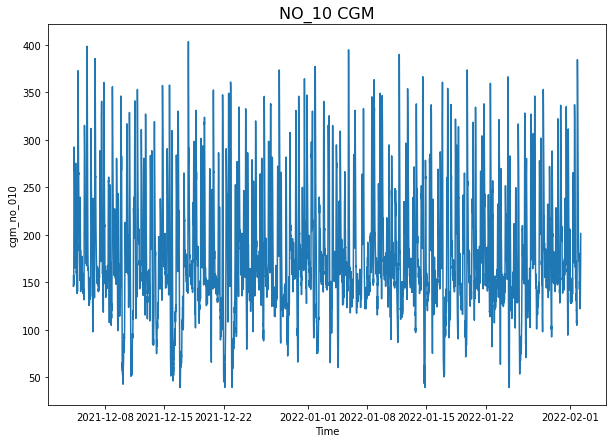

In [397]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(time_steps, cgm_no_010)
plt.ylabel("cgm_no_010")
plt.title("NO_10 CGM", fontsize=16)
plt.xlabel("Time");

## Create train, validation and test splits for  9 cgm mean data
* 70% train
* 10% validation
* 20% test


In [398]:
# Create train, validation and test splits for time series data(70% train, 10% validation, 20% test)
split_size = int(0.8 * len(mean_cgm_values))
val_size = int(7/8 * split_size)
# Create train data splits (everything before the split)
X_train, y_train = time_steps[:val_size], mean_cgm_values[:val_size]

# Create train data splits (everything before the split)
X_val, y_val = time_steps[val_size:split_size], mean_cgm_values[val_size:split_size]

# Create train data splits (everything beyond the split)
X_test, y_test = time_steps[split_size:], mean_cgm_values[split_size:]

len(X_train), len(X_val), len(X_test),  len(y_train), len(y_val), len(y_test)

(20160, 2880, 5761, 20160, 2880, 5761)

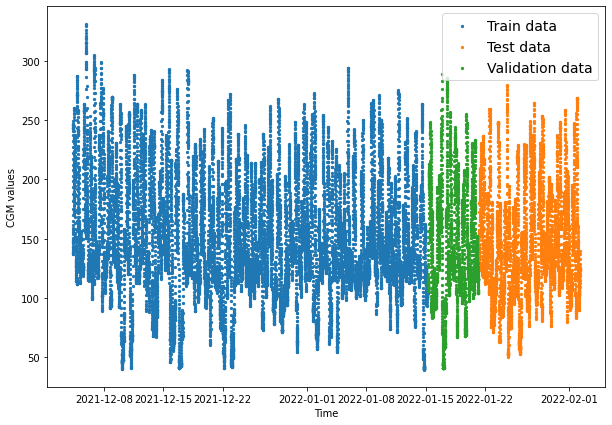

In [399]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.scatter(X_val, y_val, s=5, label="Validation data")
plt.xlabel("Time")
plt.ylabel("CGM values")
plt.legend(fontsize=14)
plt.show();

## Create train, validation and test splits for NO_010 data
70% train
10% validation
20% test

In [400]:
# Create train, validation and test splits for time series data(70% train, 10% validation, 20% test)
split_size_10 = int(0.8 * len(cgm_no_010))
val_size_10 = int(7/8 * split_size)
# Create train data splits (everything before the split)
X_train_10, y_train_10 = time_steps[:val_size_10], cgm_no_010[:val_size_10]

# Create train data splits (everything before the split)
X_val_10, y_val_10 = time_steps[val_size_10:split_size_10], cgm_no_010[val_size_10:split_size_10]

# Create train data splits (everything beyond the split)
X_test_10, y_test_10 = time_steps[split_size_10:], cgm_no_010[split_size_10:]

len(X_train_10), len(X_val_10), len(X_test_10),  len(y_train_10), len(y_val_10), len(y_test_10)

(20160, 2880, 5761, 20160, 2880, 5761)

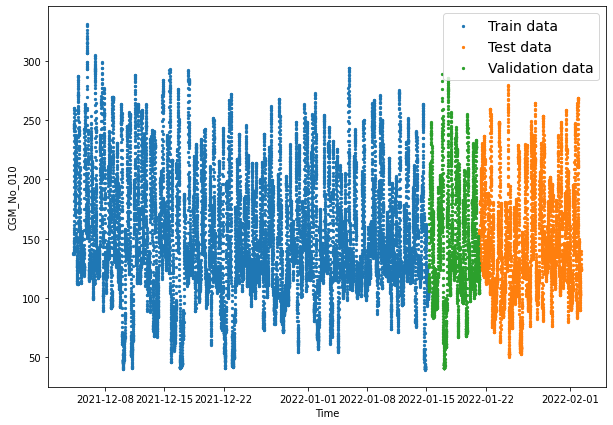

In [401]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.scatter(X_val, y_val, s=5, label="Validation data")
plt.xlabel("Time")
plt.ylabel("CGM_No_010")
plt.legend(fontsize=14)
plt.show();

## Create windowed data(30 mins(7 points) -> 60th mins(12th points))

In [402]:
# Setup window and horizon size
HORIZON = 1 # predict next 1 value
PREDICT_POINT = 12
WINDOW_SIZE = 7 # use the past 7 values to make the prediction

In [403]:
# Create function to window
def get_labelled_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    return x[:, :window_size], x[:, -horizon:]

In [404]:
# Create function to view Numpy arrays as windows 
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(predict_point+horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-predict_point), axis=0).T

    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    #print(windowed_array)

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, window_size=WINDOW_SIZE, horizon=HORIZON)
    return windows, labels

In [405]:
full_windows, full_labels= make_windows(mean_cgm_values, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT)
len(full_windows), len(full_windows)

(28789, 28789)

In [406]:
# View the first 3 windows/labels
for i in range(5):
    print(f"Window: {full_windows[i]} -> Label:{full_labels[i]}")

Window: [137.7910312  136.58355178 137.2734129  139.00811184 141.37044186
 143.9431962  146.30916808] -> Label:[140.44282052]
Window: [136.58355178 137.2734129  139.00811184 141.37044186 143.9431962
 146.30916808 148.05115075] -> Label:[138.519571]
Window: [137.2734129  139.00811184 141.37044186 143.9431962  146.30916808
 148.05115075 148.75193741] -> Label:[138.22812178]
Window: [139.00811184 141.37044186 143.9431962  146.30916808 148.05115075
 148.75193741 148.05879806] -> Label:[139.87332765]
Window: [141.37044186 143.9431962  146.30916808 148.05115075 148.75193741
 148.05879806 146.00590865] -> Label:[142.97860662]


In [407]:
def make_train_val_test_splits(windows, labels, test_split=0.2):
    """
    Split matching pairs of windows and labels into train, validaiton and test splits.
    """
    split_size = int(len(windows) * (1-test_split))
    val_size = int(7/8 * split_size)
    train_windows = windows[:val_size]
    train_labels = labels[:val_size]
    val_windows = windows[val_size:split_size]
    val_labels = labels[val_size:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, val_windows, test_windows, train_labels, val_labels, test_labels

In [408]:
train_windows, val_windows, test_windows, train_labels, val_labels, test_labels = make_train_val_test_splits(full_windows, full_labels, test_split=0.2)

In [409]:
len(train_windows), len(val_windows), len(test_windows), len(train_labels), len(val_labels), len(test_labels)

(20152, 2879, 5758, 20152, 2879, 5758)

In [410]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                              verbose=0, # only output a limited amount of text
                                              save_best_only=True)

In [411]:
import tensorflow as tf
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy()}

In [412]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values a across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (similar to start but for the end)
    label : label to show on plot about values, defalut None
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("CGM value")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

## Create windowed data(30 mins(7 points) -> 60th mins(12th points)) for adult0010


In [413]:
full_windows_10, full_labels_10= make_windows(cgm_no_010, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT)
len(full_windows_10), len(full_windows_10)

(28789, 28789)

In [414]:
# View the first 3 windows/labels
for i in range(5):
    print(f"Window: {full_windows_10[i]} -> Label:{full_labels_10[i]}")

Window: [146.61102461 145.40354519 146.09340631 147.82810523 150.19043517
 152.76318925 155.12916049] -> Label:[149.28271287]
Window: [145.40354519 146.09340631 147.82810523 150.19043517 152.76318925
 155.12916049 156.87114184] -> Label:[147.44485553]
Window: [146.09340631 147.82810523 150.19043517 152.76318925 155.12916049
 156.87114184 157.57192613] -> Label:[147.40482064]
Window: [147.82810523 150.19043517 152.76318925 155.12916049 156.87114184
 157.57192613 156.87878289] -> Label:[149.60244889]
Window: [150.19043517 152.76318925 155.12916049 156.87114184 157.57192613
 156.87878289 154.82590544] -> Label:[153.6985063]


In [415]:
train_windows_10, val_windows_10, test_windows_10, train_labels_10, val_labels_10, test_labels_10 = make_train_val_test_splits(full_windows_10, full_labels_10, test_split=0.2)

In [416]:
len(train_windows_10), len(val_windows_10), len(test_windows_10), len(train_labels_10), len(val_labels_10), len(test_labels_10)

(20152, 2879, 5758, 20152, 2879, 5758)

## Experiment 1(Dense model)
* Use the mean of no01-09 training a model
* Validated by no01-09 data
* Test on no010



In [417]:
import tensorflow as tf
from tensorflow.keras import layers

In [418]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(21)

In [419]:
model_1 = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows, val_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 10ms/step - loss: 20.5352 - mae: 20.5352 - mse: 1384.4611 - val_loss: 10.5854 - val_mae: 10.5854 - val_mse: 204.1860
Epoch 2/200
158/158 [==============================] - 1s 9ms/step - loss: 10.0665 - mae: 10.0665 - mse: 184.2314 - val_loss: 10.4388 - val_mae: 10.4388 - val_mse: 191.9276
Epoch 3/200
158/158 [==============================] - 1s 9ms/step - loss: 9.8659 - mae: 9.8659 - mse: 174.3875 - val_loss: 10.0518 - val_mae: 10.0518 - val_mse: 180.8851
Epoch 4/200
158/158 [==============================] - 1s 9ms/step - loss: 9.8127 - mae: 9.8127 - mse: 171.9014 - val_loss: 9.8893 - val_mae: 9.8893 - val_mse: 175.8679
Epoch 5/200
158/158 [==============================] - 1s 4ms/step - loss: 9.6294 - mae: 9.6294 - mse: 165.9913 - val_loss: 9.9813 - val_mae: 9.9813 - val_mse: 179.1282
Epoch 6/200
158/158 [==============================] - 1s 9ms/step - loss: 9.6047 - mae: 9.6047 - mse: 164.4769 - val_loss: 9.6517 - val_mae: 9

In [420]:
def make_preds(model, input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    ----------
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [421]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows_10, test_labels_10)

180/180 [==============================] - 1s 3ms/step - loss: 8.3472 - mae: 8.3472 - mse: 142.8162


[8.347219467163086, 8.347219467163086, 142.81622314453125]

In [422]:
# predict #adult010 using model_1
model_1_preds = make_preds(model_1, test_windows_10)
len(model_1_preds), model_1_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([157.92072, 162.05304, 166.53113, 171.08957, 175.25783, 178.9372 ,
        182.03777, 184.43631, 186.1658 , 187.01433], dtype=float32)>)

In [423]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels_10), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 8.347218, 'mape': 4.8970494, 'mse': 142.81624, 'rmse': 11.950575}

## Experiment 2(Dense model)
* Use no010 data training a model
* Validated by no10 data
* make prediction on no010




In [424]:
model_1_a = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON)
], name="model_1_a_dense")

model_1_a.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_a.fit(x=train_windows_10,
            y=train_labels_10,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10, val_labels_10),
            callbacks=[create_model_checkpoint(model_name=model_1_a.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 10ms/step - loss: 24.4141 - mae: 24.4141 - mse: 1439.3944 - val_loss: 19.3089 - val_mae: 19.3089 - val_mse: 847.4166
Epoch 2/200
158/158 [==============================] - 1s 9ms/step - loss: 16.2596 - mae: 16.2596 - mse: 624.3879 - val_loss: 14.6358 - val_mae: 14.6358 - val_mse: 465.1897
Epoch 3/200
158/158 [==============================] - 1s 9ms/step - loss: 12.7909 - mae: 12.7909 - mse: 349.5570 - val_loss: 12.9366 - val_mae: 12.9366 - val_mse: 330.7780
Epoch 4/200
158/158 [==============================] - 1s 9ms/step - loss: 12.0917 - mae: 12.0917 - mse: 291.1435 - val_loss: 12.6265 - val_mae: 12.6265 - val_mse: 312.6008
Epoch 5/200
158/158 [==============================] - 1s 4ms/step - loss: 11.8868 - mae: 11.8868 - mse: 278.6032 - val_loss: 13.1636 - val_mae: 13.1636 - val_mse: 343.2171
Epoch 6/200
158/158 [==============================] - 1s 9ms/step - loss: 11.8653 - mae: 11.8653 - mse: 276.8395 - val_loss: 12.3949

In [425]:
model_1_a = tf.keras.models.load_model("model_experiments/model_1_a_dense/")

In [426]:
# Make predictions using model_1 on the test dataset and view the results
model_1_a_preds = make_preds(model_1_a, test_windows_10)
len(model_1_a_preds), model_1_a_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([157.23639, 161.8964 , 166.62213, 171.25175, 175.45398, 179.04665,
        181.95656, 184.12486, 185.45134, 185.80879], dtype=float32)>)

In [427]:
# Evaluate preds
model_1_a_results = evaluate_preds(y_true=tf.squeeze(test_labels_10), # reduce to right shape
                                 y_pred=model_1_a_preds)
model_1_a_results

{'mae': 8.642945, 'mape': 5.105221, 'mse': 147.79434, 'rmse': 12.157069}


## Experiment 3(Dense model)
* Use the mean of no01-09 training a model
* Validated by no10 data
* Test on no010




In [428]:
model_1_b = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_b_dense")

model_1_b.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_b.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10, val_labels_10),
            callbacks=[create_model_checkpoint(model_name=model_1_b.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 10ms/step - loss: 22.3999 - mae: 22.3999 - mse: 1329.9214 - val_loss: 19.2339 - val_mae: 19.2339 - val_mse: 802.1415
Epoch 2/200
158/158 [==============================] - 2s 12ms/step - loss: 12.0787 - mae: 12.0787 - mse: 288.0079 - val_loss: 15.6542 - val_mae: 15.6542 - val_mse: 523.5204
Epoch 3/200
158/158 [==============================] - 1s 9ms/step - loss: 10.3252 - mae: 10.3252 - mse: 199.4745 - val_loss: 13.3195 - val_mae: 13.3195 - val_mse: 366.4021
Epoch 4/200
158/158 [==============================] - 1s 9ms/step - loss: 9.6423 - mae: 9.6423 - mse: 167.0914 - val_loss: 12.9098 - val_mae: 12.9098 - val_mse: 327.4114
Epoch 5/200
158/158 [==============================] - 1s 9ms/step - loss: 9.3947 - mae: 9.3947 - mse: 157.6819 - val_loss: 12.5919 - val_mae: 12.5919 - val_mse: 317.3303
Epoch 6/200
158/158 [==============================] - 1s 4ms/step - loss: 9.3263 - mae: 9.3263 - mse: 154.8832 - val_loss: 12.6171 - va

In [429]:
model_1_b = tf.keras.models.load_model("model_experiments/model_1_b_dense/")

In [430]:
# Make predictions using model_1 on the test dataset and view the results
model_1_b_preds = make_preds(model_1_b, test_windows_10)
len(model_1_b_preds), model_1_b_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([157.675  , 162.06119, 166.7947 , 171.50752, 175.72429, 179.31758,
        182.31467, 184.64561, 186.15703, 186.70876], dtype=float32)>)

In [431]:
# Evaluate preds
model_1_b_results = evaluate_preds(y_true=tf.squeeze(test_labels_10), # reduce to right shape
                                 y_pred=model_1_b_preds)
model_1_b_results

{'mae': 8.287615, 'mape': 4.8594494, 'mse': 142.67072, 'rmse': 11.944485}

# scenario 2: use cgm data of 1 adults to self predict(7 days)

## prepare NO_0010 data (only last 1 week)

In [432]:
time_steps_7d = time_steps[:3360]
cgm_no_010_7d = cgm_no_010[:3360]

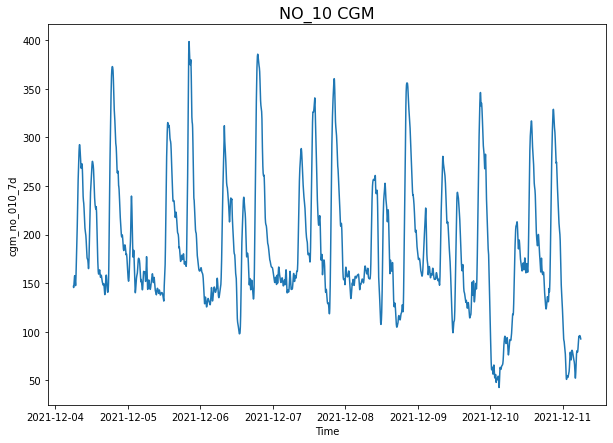

In [433]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(time_steps_7d, cgm_no_010_7d)
plt.ylabel("cgm_no_010_7d")
plt.title("NO_10 CGM", fontsize=16)
plt.xlabel("Time");

## Create train, validation and test splits for No_0010_7d
* 70% train
* 10% validation
* 20% test


In [434]:
# Create train, validation and test splits for time series data
split_size = int(0.8 * len(cgm_no_010_7d))
val_size = int(7/8 * split_size)
# Create train data splits (everything before the split)
X_train, y_train = time_steps_7d[:val_size], cgm_no_010_7d[:val_size]

# Create train data splits (everything before the split)
X_val, y_val = time_steps_7d[val_size:split_size], cgm_no_010_7d[val_size:split_size]

# Create train data splits (everything beyond the split)
X_test, y_test = time_steps_7d[split_size:], cgm_no_010_7d[split_size:]

len(X_train), len(X_val), len(X_test),  len(y_train), len(y_val), len(y_test)

(2352, 336, 672, 2352, 336, 672)

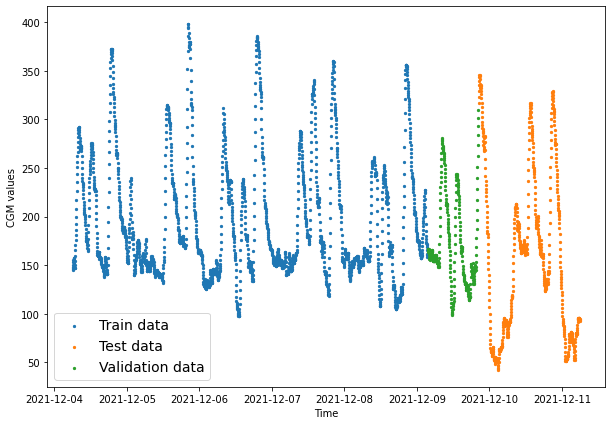

In [435]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.scatter(X_val, y_val, s=5, label="Validation data")
plt.xlabel("Time")
plt.ylabel("CGM values")
plt.legend(fontsize=14)
plt.show();

## Create windowed data(30 mins(7 points) -> 60th mins(12th points)) for no_010_7d

In [436]:
full_windows_10_7d, full_labels_10_7d= make_windows(cgm_no_010_7d, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT)
len(full_windows_10_7d), len(full_windows_10_7d)

(3348, 3348)

In [437]:
# View the first 3 windows/labels
for i in range(5):
    print(f"Window: {full_windows_10_7d[i]} -> Label:{full_labels_10_7d[i]}")

Window: [146.61102461 145.40354519 146.09340631 147.82810523 150.19043517
 152.76318925 155.12916049] -> Label:[149.28271287]
Window: [145.40354519 146.09340631 147.82810523 150.19043517 152.76318925
 155.12916049 156.87114184] -> Label:[147.44485553]
Window: [146.09340631 147.82810523 150.19043517 152.76318925 155.12916049
 156.87114184 157.57192613] -> Label:[147.40482064]
Window: [147.82810523 150.19043517 152.76318925 155.12916049 156.87114184
 157.57192613 156.87878289] -> Label:[149.60244889]
Window: [150.19043517 152.76318925 155.12916049 156.87114184 157.57192613
 156.87878289 154.82590544] -> Label:[153.6985063]


In [438]:
train_windows_10_7d, val_windows_10_7d, test_windows_10_7d, train_labels_10_7d, val_labels_10_7d, test_labels_10_7d = make_train_val_test_splits(full_windows_10_7d, full_labels_10_7d, test_split=0.2)

In [439]:
len(train_windows_10_7d), len(val_windows_10_7d), len(test_windows_10_7d), len(train_labels_10_7d), len(val_labels_10_7d), len(test_labels_10_7d)

(2343, 335, 670, 2343, 335, 670)


## Experiment 4(Dense model) 7days
* Use no10 data training a model
* Validated by no10 data
* Test on no010




In [440]:
model_2 = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_dense") 

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=train_windows_10_7d,
            y=train_labels_10_7d,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10_7d, val_labels_10_7d),
            callbacks=[create_model_checkpoint(model_name=model_2.name)]
            )

Epoch 1/200
19/19 [==============================] - 1s 54ms/step - loss: 39.2386 - mae: 39.2386 - mse: 2798.5837 - val_loss: 21.6066 - val_mae: 21.6066 - val_mse: 1064.6709
Epoch 2/200
19/19 [==============================] - 1s 47ms/step - loss: 22.3991 - mae: 22.3991 - mse: 1230.8950 - val_loss: 21.3280 - val_mae: 21.3280 - val_mse: 950.9393
Epoch 3/200
19/19 [==============================] - 1s 47ms/step - loss: 20.5365 - mae: 20.5365 - mse: 1071.2902 - val_loss: 19.9635 - val_mae: 19.9635 - val_mse: 934.1196
Epoch 4/200
19/19 [==============================] - 1s 47ms/step - loss: 19.5399 - mae: 19.5399 - mse: 991.5354 - val_loss: 19.1654 - val_mae: 19.1654 - val_mse: 887.4993
Epoch 5/200
19/19 [==============================] - 1s 44ms/step - loss: 18.6668 - mae: 18.6668 - mse: 901.9341 - val_loss: 18.8271 - val_mae: 18.8271 - val_mse: 857.0607
Epoch 6/200
19/19 [==============================] - 1s 45ms/step - loss: 18.3440 - mae: 18.3440 - mse: 854.8146 - val_loss: 18.2369 - v

In [441]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")

In [442]:
# Make predictions using model_1 on the test dataset and view the results
model_2_preds = make_preds(model_2, test_windows_10_7d)
len(model_2_preds), model_2_preds[:10]

(670, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([325.75302, 329.95938, 332.83334, 335.03653, 337.07434, 339.23868,
        341.37708, 342.69745, 342.37082, 339.82965], dtype=float32)>)

In [443]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_10_7d), # reduce to right shape
                                 y_pred=model_2_preds)
model_2_results

{'mae': 10.387269, 'mape': 9.247202, 'mse': 191.67244, 'rmse': 13.844583}


## Experiment 5(Dense model) 7days
* Use the mean of no01-09 training a model
* Validated by no10 data
* Test on no010




In [444]:
model_2_a = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_a_dense")

model_2_a.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_a.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10_7d, val_labels_10_7d),
            callbacks=[create_model_checkpoint(model_name=model_2_a.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 10ms/step - loss: 31.2309 - mae: 31.2309 - mse: 2768.0408 - val_loss: 20.2759 - val_mae: 20.2759 - val_mse: 932.7034
Epoch 2/200
158/158 [==============================] - 1s 8ms/step - loss: 12.4636 - mae: 12.4636 - mse: 306.5814 - val_loss: 15.2927 - val_mae: 15.2927 - val_mse: 468.9568
Epoch 3/200
158/158 [==============================] - 1s 8ms/step - loss: 10.3581 - mae: 10.3581 - mse: 195.0919 - val_loss: 13.7417 - val_mae: 13.7417 - val_mse: 369.4015
Epoch 4/200
158/158 [==============================] - 1s 9ms/step - loss: 9.8284 - mae: 9.8284 - mse: 174.7878 - val_loss: 13.1199 - val_mae: 13.1199 - val_mse: 311.7685
Epoch 5/200
158/158 [==============================] - 1s 9ms/step - loss: 9.5425 - mae: 9.5425 - mse: 164.2439 - val_loss: 12.5086 - val_mae: 12.5086 - val_mse: 297.0670
Epoch 6/200
158/158 [==============================] - 1s 8ms/step - loss: 9.4632 - mae: 9.4632 - mse: 160.9853 - val_loss: 12.3478 - val

In [445]:
model_2_a = tf.keras.models.load_model("model_experiments/model_2_a_dense/")

In [446]:
# Make predictions using model_1 on the test dataset and view the results
model_2_a_preds = make_preds(model_2_a, test_windows_10_7d)
len(model_2_a_preds), model_2_a_preds[:10]

(670, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([336.21518, 339.1559 , 340.737  , 341.9285 , 344.64633, 348.039  ,
        350.55737, 351.33246, 349.93564, 346.63553], dtype=float32)>)

In [447]:
# Evaluate preds
model_2_a_results = evaluate_preds(y_true=tf.squeeze(test_labels_10_7d), # reduce to right shape
                                 y_pred=model_2_a_preds)
model_2_a_results

{'mae': 8.631009, 'mape': 7.2279563, 'mse': 137.32991, 'rmse': 11.718785}